In [1]:
# Project name : NLP Patient Condition Classification
# Objective : Analyze patient condition based on reviews of respective drugs
# We will be focussing on Depression, High Blood Pressure and Diabetes Type 2

**Import necessary libraries**



In [1]:
import pandas as pd
import itertools
import string
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)

**Import dataset**

In [2]:
df1 = pd.read_csv('drugsCom_raw.tsv', sep = '\t')

In [3]:
df1.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
df1.tail()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9.0,"December 13, 2014",116


In [5]:
df1.shape

(161297, 7)

In [6]:
df1.condition.value_counts().head()

condition
Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Acne              5588
Name: count, dtype: int64

**Filtered data based on Depression, High Blood Pressure and Diabetes Type 2**

In [7]:
df1 = df1[(df1['condition']=='Depression') | (df1['condition']=='High Blood Pressure') | (df1['condition']=='Diabetes, Type 2')]

In [8]:
df1.shape

(13944, 7)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13944 entries, 11 to 161290
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13944 non-null  int64  
 1   drugName     13944 non-null  object 
 2   condition    13944 non-null  object 
 3   review       13944 non-null  object 
 4   rating       13944 non-null  float64
 5   date         13944 non-null  object 
 6   usefulCount  13944 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 871.5+ KB


In [10]:
df = df1.drop(['Unnamed: 0','rating','date','usefulCount'],axis=1)

**EDA**

In [11]:
df.condition.value_counts()

condition
Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: count, dtype: int64

In [12]:
df.head()

,drugName,condition,review
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with..."
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings...."
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ..."
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l..."
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits..."


In [13]:
df.tail()

,drugName,condition,review
161251,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f..."
161258,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb...."
161278,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p..."
161286,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx..."
161290,Tekturna,High Blood Pressure,"""I have only been on Tekturna for 9 days. The ..."


**Segregating dataframe for analyzing individual condition**

In [14]:
x_dep = df[(df['condition'] == 'Depression')]
x_bp = df[(df['condition'] == 'High Blood Pressure')]
x_diab = df[(df['condition'] == 'Diabetes, Type 2')]

**Word cloud for Depression**

In [15]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(x_dep.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for Depression', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for Depression')

**Word cloud for High Blood Pressure**

In [16]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(x_bp.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for High Blood Pressure', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for High Blood Pressure')

**Word cloud for Diabetes, Type 2**

In [17]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(x_diab.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for Diabetes, Type 2', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for Diabetes, Type 2')

**Data pre-processing**

In [18]:
for i, col in enumerate(df.columns):
  df.iloc[:, i] = df.iloc[:, i].str.replace('"', '')

In [19]:
df.head()

,drugName,condition,review
11,L-methylfolate,Depression,"I have taken anti-depressants for years, with ..."
31,Sertraline,Depression,1 week on Zoloft for anxiety and mood swings. ...
44,Venlafaxine,Depression,my gp started me on Venlafaxine yesterday to h...
50,Dulaglutide,"Diabetes, Type 2","Hey Guys, It&#039;s been 4 months since my la..."
67,Effexor XR,Depression,This medicine saved my life. I was at my wits ...


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Stopwords**

In [21]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Lemmatization**

In [22]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [23]:
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [24]:
from bs4 import BeautifulSoup
import re

In [25]:
def review_to_words(raw_review):

  # 1. Delete HTML
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()

  # 2. Make a space
  letters_only = re.sub('[^a-zA-Z]', ' ', review_text)

  # 3. Lower letters
  words = letters_only.lower().split()

  # 4. Stopwords
  meaningful_words = [w for w in words if not w in stop]

  # 5. Lemmatization
  lemmatize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]

  # 6. Space join words
  return(' '.join(lemmatize_words))


In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
df['review_clean'] = df['review'].apply(review_to_words)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18448\91131721.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [28]:
df['drug_name'] = df['drugName'].apply(review_to_words)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18448\91131721.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [29]:
df.head()

,drugName,condition,review,review_clean,drug_name
11,L-methylfolate,Depression,"I have taken anti-depressants for years, with ...",taken anti depressant year improvement mostly ...,l methylfolate
31,Sertraline,Depression,1 week on Zoloft for anxiety and mood swings. ...,week zoloft anxiety mood swing take mg morning...,sertraline
44,Venlafaxine,Depression,my gp started me on Venlafaxine yesterday to h...,gp started venlafaxine yesterday help depressi...,venlafaxine
50,Dulaglutide,"Diabetes, Type 2","Hey Guys, It&#039;s been 4 months since my la...",hey guy month since last post wanted give mont...,dulaglutide
67,Effexor XR,Depression,This medicine saved my life. I was at my wits ...,medicine saved life wit end anti depressant re...,effexor xr


In [30]:
# Drugs condition

condition_DName = df1.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_DName[0:20].plot(kind="bar",# Specify the plot type as a bar chart.
                           figsize = (14,6),# Set the size of the plot (14 inches wide, 6 inches tall).
                           fontsize = 10,# Set the font size for the axis tick labels.
                           color="olive") # Set the color of the bars to olive green.

plt.xlabel("",fontsize = 20)  # Customize the x-axis label (currently left blank) and set its font size
plt.ylabel("",fontsize = 20)  # Customize the y-axis label (currently left blank) and set its font size
plt.title("Drugs condition", fontsize = 20)  # Add a title to the plot and set its font size.

Text(0.5, 1.0, 'Drugs condition')

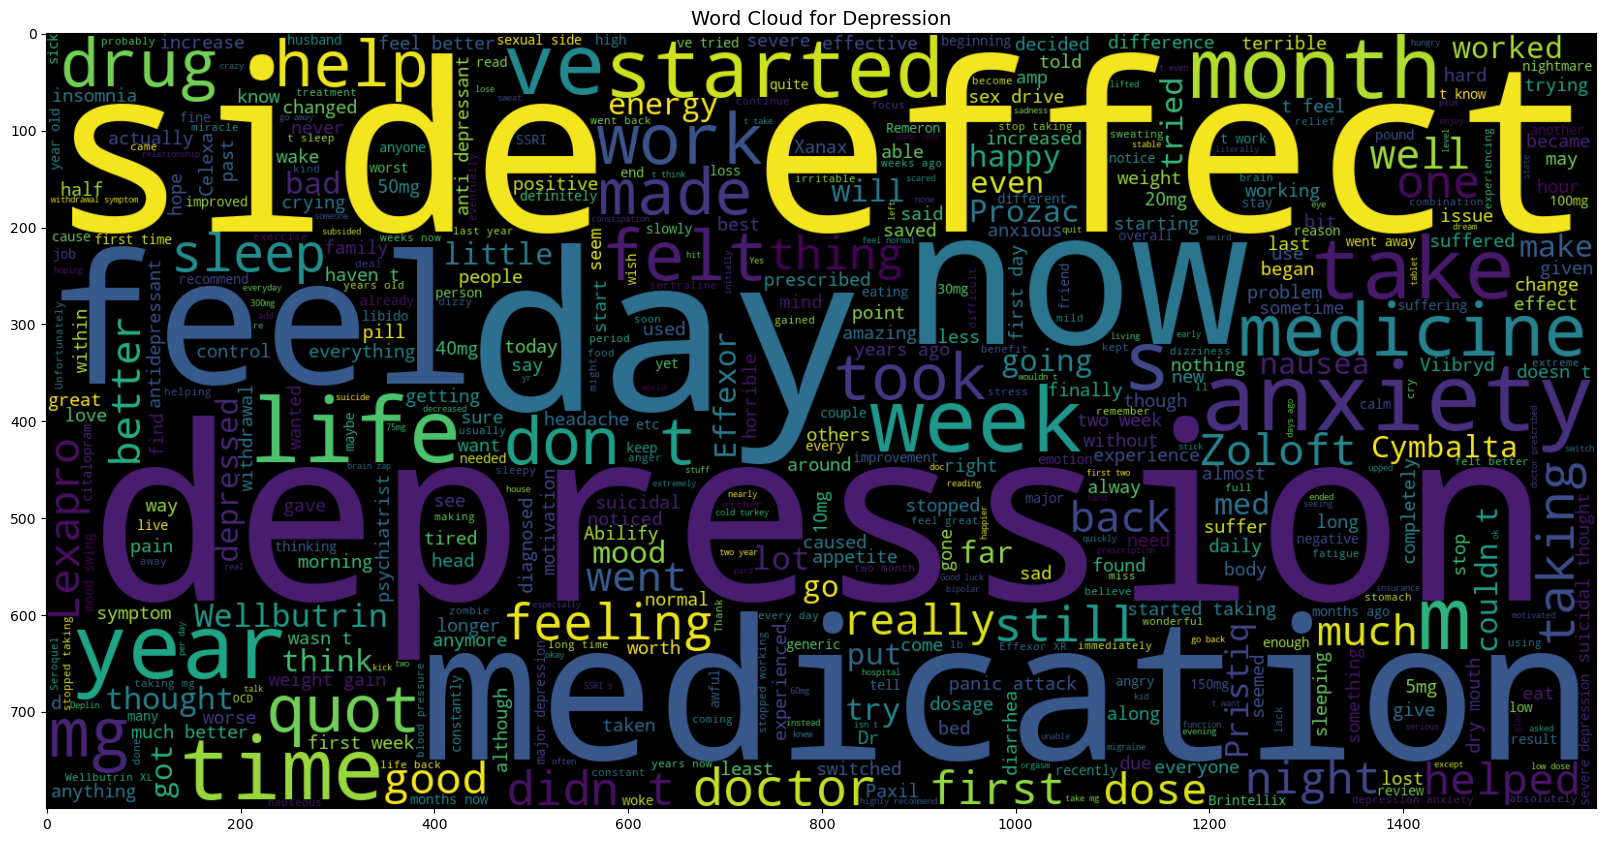

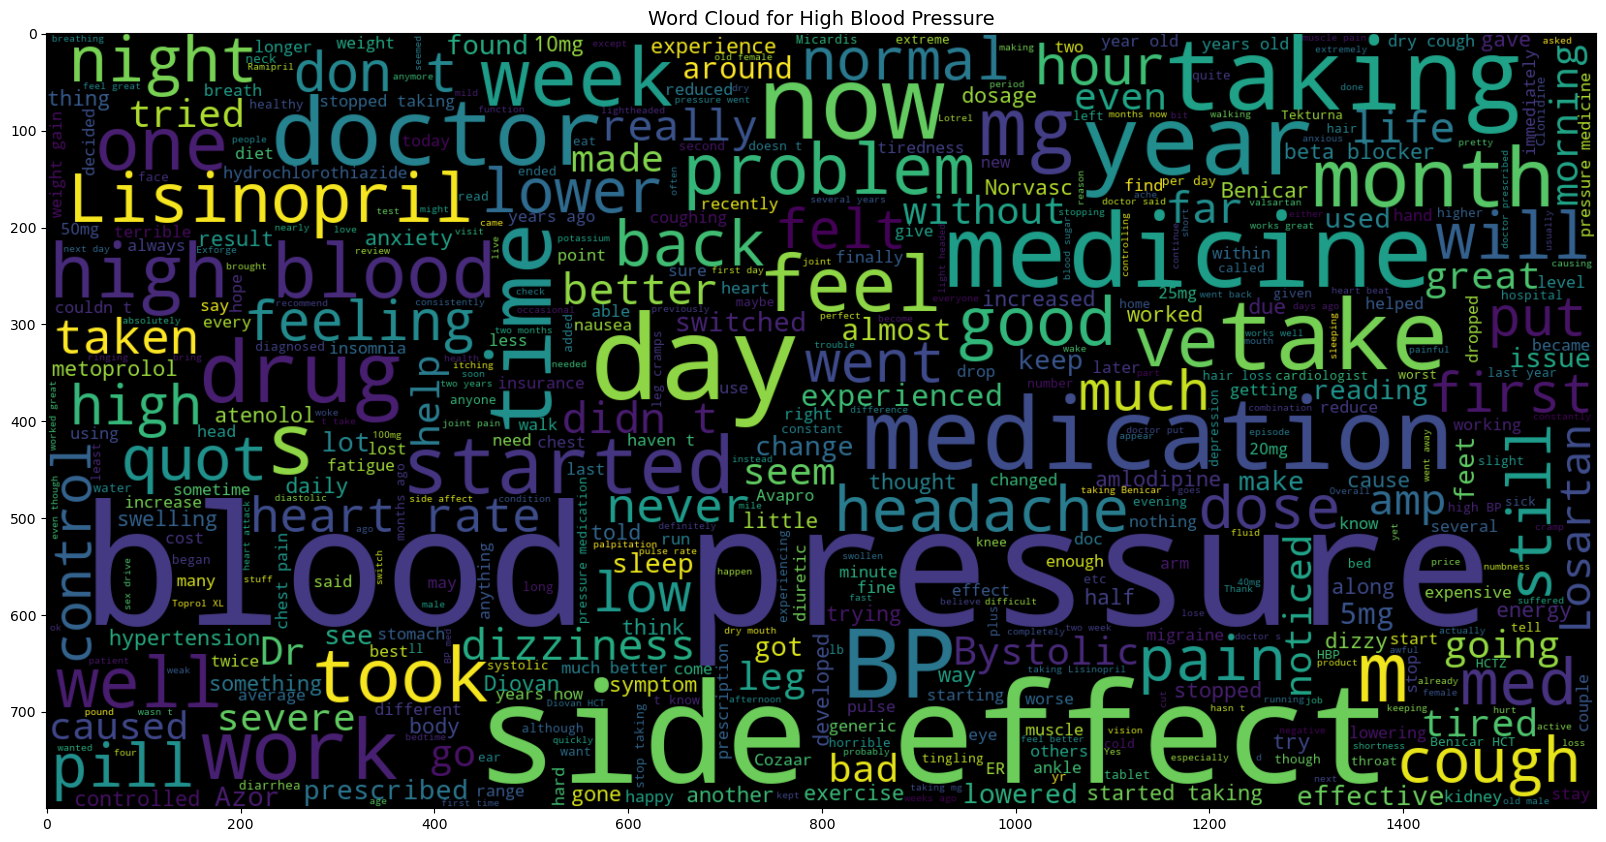

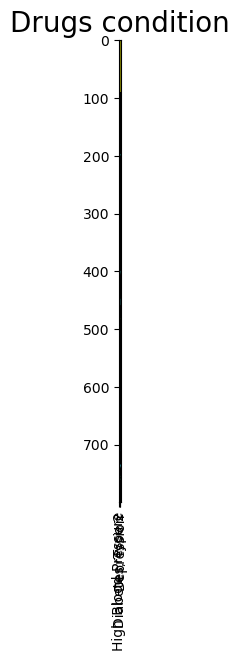

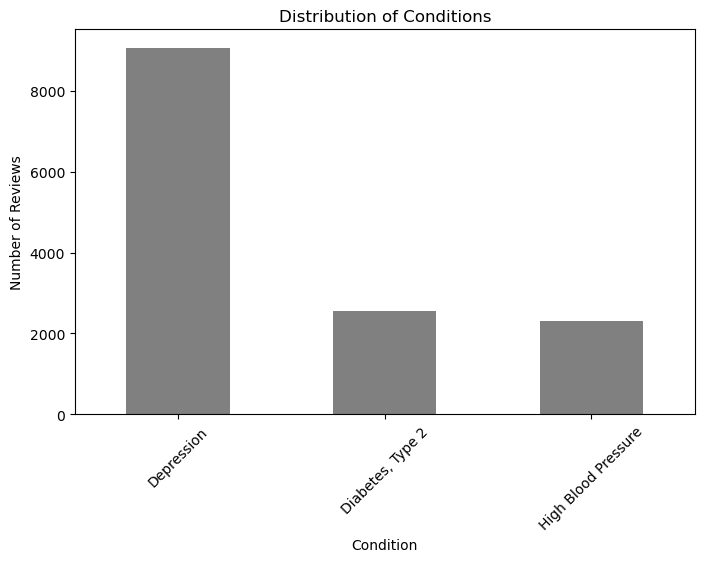

In [31]:
# Distribution of conditions
condition_counts = df['condition'].value_counts()
plt.figure(figsize=(8, 5))
condition_counts.plot(kind='bar', color='grey')
plt.title('Distribution of Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

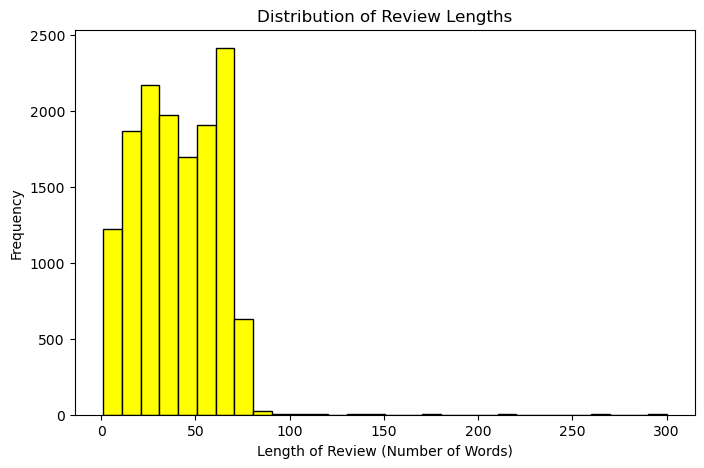

In [32]:
# Length of Reviews

df['review_length'] = df['review_clean'].apply(lambda df: len(df.split()))
plt.figure(figsize=(8, 5))
plt.hist(df['review_length'], bins=30, color='yellow', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review (Number of Words)')
plt.ylabel('Frequency')
plt.show()

In [33]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

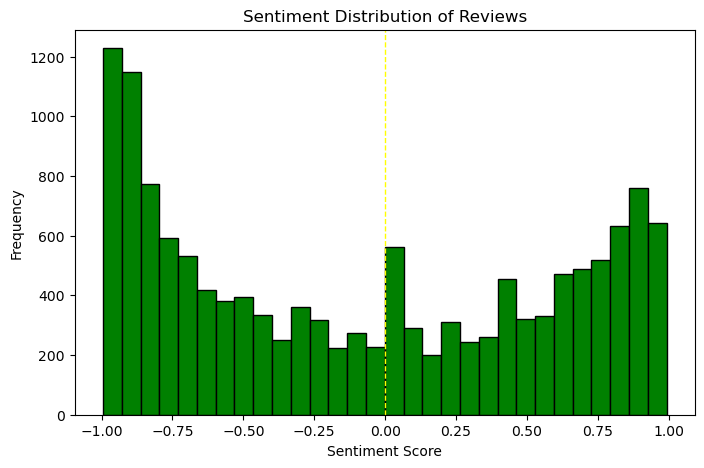

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['review_clean'].apply(lambda df: sia.polarity_scores(df)['compound'])

plt.figure(figsize=(8, 5))
plt.hist(df['sentiment'], bins=30, color='green', edgecolor='black')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(0, color='yellow', linestyle='dashed', linewidth=1)  # Add a vertical line at 0
plt.show()

In [35]:
df.head()

,drugName,condition,review,review_clean,drug_name,review_length,sentiment
11,L-methylfolate,Depression,"I have taken anti-depressants for years, with ...",taken anti depressant year improvement mostly ...,l methylfolate,43,-0.0000
31,Sertraline,Depression,1 week on Zoloft for anxiety and mood swings. ...,week zoloft anxiety mood swing take mg morning...,sertraline,28,-0.4458
44,Venlafaxine,Depression,my gp started me on Venlafaxine yesterday to h...,gp started venlafaxine yesterday help depressi...,venlafaxine,69,-0.4215
50,Dulaglutide,"Diabetes, Type 2","Hey Guys, It&#039;s been 4 months since my la...",hey guy month since last post wanted give mont...,dulaglutide,63,0.3400
67,Effexor XR,Depression,This medicine saved my life. I was at my wits ...,medicine saved life wit end anti depressant re...,effexor xr,51,-0.1152


In [61]:
df.tail()

,drugName,condition,review,review_clean,drug_name,review_length,sentiment
161251,Metoprolol,High Blood Pressure,It is fourth blood pressure pill for me. It fe...,fourth blood pressure pill feel like partly wo...,metoprolol,18,-0.8126
161258,Bystolic,High Blood Pressure,While on Bystolic my feet and arms were numb. ...,bystolic foot arm numb blood sugar became seve...,bystolic,36,-0.8779
161278,Invokana,"Diabetes, Type 2",I just got diagnosed with type 2. My doctor pr...,got diagnosed type doctor prescribed invokana ...,invokana,21,0.2960
161286,Vortioxetine,Depression,This is the third med I&#039;ve tried for anxi...,third med tried anxiety mild depression week h...,vortioxetine,19,-0.9201
161290,Tekturna,High Blood Pressure,I have only been on Tekturna for 9 days. The e...,tekturna day effect immediate also calcium cha...,tekturna,34,-0.5574


**Creating features and target variable**

In [36]:
x = df['review_clean']
y = df['condition']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)

In [38]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion Matrix without normalization')

  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

**Bag of words**

In [39]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(x_train)

count_test = count_vectorizer.transform(x_test)

count_train

<11155x11177 sparse matrix of type '<class 'numpy.int64'>'
	with 328611 stored elements in Compressed Sparse Row format>

**Naive Bayes Model**

In [40]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Naive Bayes Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Naive Bayes Accuracy : 0.956
Confusion Matrix without normalization


**Passive Aggressive Classifier**

In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Passive Aggressive Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Passive Aggressive Accuracy : 0.952
Confusion Matrix without normalization


LogisticRegression

In [42]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(count_train,y_train)
pred = logistic.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Logistic Regression accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Logistic Regression accuracy :0.959
Confusion Matrix without normalization


RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(count_train,y_train)
pred = random.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Random Forest accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Random Forest accuracy :0.966
Confusion Matrix without normalization


DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier()
decision.fit(count_train,y_train)
pred = decision.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Decision Tree accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Decision Tree accuracy :0.939
Confusion Matrix without normalization


GradientBoostingClassifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(learning_rate=0.1)
gradient.fit(count_train,y_train)
pred = gradient.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Gradient Boosting accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Gradient Boosting accuracy :0.934
Confusion Matrix without normalization


**TFIDF**

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(x_train)
tfidf_test_2 = tfidf_vectorizer.transform(x_test)

**Naive Bayes using TFIDF**

In [45]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print('Naive Bayes Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Naive Bayes Accuracy : 0.947
Confusion Matrix without normalization


**Passive Agressive Classifier using TFIDF**

In [46]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

passive = PassiveAggressiveClassifier()
passive.fit(tfidf_train, y_train)
pred = passive.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print('Passive Aggressive Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Passive Aggressive Accuracy : 0.961
Confusion Matrix without normalization


**TFIDF Bigrams**

In [47]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(x_train)
tfidf_test_2 = tfidf_vectorizer.transform(x_test)

passive = PassiveAggressiveClassifier()
passive.fit(tfidf_train_2, y_train)
pred = passive.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print('Passive Aggressive Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Passive Aggressive Accuracy : 0.959
Confusion Matrix without normalization


**TFIDF Trigrams**

In [48]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer.fit_transform(x_train)
tfidf_test_3 = tfidf_vectorizer.transform(x_test)

passive = PassiveAggressiveClassifier()
passive.fit(tfidf_train_3, y_train)
pred = passive.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print('Passive Aggressive Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Passive Aggressive Accuracy : 0.961
Confusion Matrix without normalization


**Feature engineering**

In [49]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
  labelid = list(classifier.classes_).index(classlabel)
  feature_names = vectorizer.get_feature_names_out()
  topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

  for coef, feat in topn:
    print(classlabel, feat, coef)

In [50]:
# Depression features

most_informative_feature_for_class(tfidf_vectorizer,passive,'Depression')

Depression viibryd 4.93073989079414
Depression celexa 4.94355021211522
Depression effexor 5.0682048454026685
Depression mood 5.3179560944230735
Depression lexapro 5.366952927829829
Depression antidepressant 5.736803744285945
Depression zoloft 5.74928428307868
Depression wellbutrin 7.675917945019178
Depression pristiq 8.688677178666898
Depression depression 11.820028240299377


In [51]:
# High Blood Pressure features

most_informative_feature_for_class(tfidf_vectorizer,passive,'High Blood Pressure')

High Blood Pressure atenolol 4.1858078230016575
High Blood Pressure metoprolol 4.3627384191871394
High Blood Pressure amlodipine 4.51206092423194
High Blood Pressure losartan 4.584894949240933
High Blood Pressure benicar 4.889624465239076
High Blood Pressure bystolic 5.116377497720618
High Blood Pressure lisinopril 6.080931241602256
High Blood Pressure cough 6.126974893295532
High Blood Pressure bp 7.167449860241718
High Blood Pressure pressure 8.854293618621327


In [52]:
# Diabetes, Type 2 features

most_informative_feature_for_class(tfidf_vectorizer,passive,'Diabetes, Type 2')

Diabetes, Type 2 diabetes 4.270707154021349
Diabetes, Type 2 byetta 4.310099807218155
Diabetes, Type 2 shot 4.327984380679493
Diabetes, Type 2 trulicity 5.462207329974292
Diabetes, Type 2 invokana 5.618249654607512
Diabetes, Type 2 januvia 5.652160941864489
Diabetes, Type 2 injection 6.4966679856706
Diabetes, Type 2 metformin 6.862937209061318
Diabetes, Type 2 victoza 7.605763893106672
Diabetes, Type 2 sugar 8.303698204793509


Here we choose random forest for deployment

In [53]:
x = df['review_clean']
y = df['condition']

In [54]:
# Define the pipeline
model = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000)),  # Convert text to numerical features
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest Classifier
])


In [55]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
# Fit the pipeline on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=5000)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
                     precision    recall  f1-score   support

         Depression       0.96      0.99      0.97      1800
   Diabetes, Type 2       0.99      0.94      0.96       501
High Blood Pressure       0.96      0.88      0.92       488

           accuracy                           0.96      2789
          macro avg       0.97      0.94      0.95      2789
       weighted avg       0.96      0.96      0.96      2789

Confusion Matrix:
[[1784    2   14]
 [  28  471    2]
 [  54    3  431]]


In [60]:
import joblib

with open('NL.pkl', 'wb') as f:
    joblib.dump(model, f)